# Exploring und Plotting

**Inhalt:** Selbständige Übung in Gruppen

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Daten herunterladen und einlesbar aufbereiten
- Selbständig Daten explorieren und Storyideen testen
- Colormaps kennenlernen

# Das Beispiel

Temperaturdaten von Meteoschweiz.

Quelle und Dokumentation: https://www.meteoschweiz.admin.ch/home/klima/schweizer-klima-im-detail/schweizer-temperaturmittel/daten-schweizer-temperaturmittel.html

Datenfile: https://www.meteoschweiz.admin.ch/product/input/climate-data/swissmean/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt

Speichern Sie die Datei an einem geeigneten Ort, zB im Unterornder `dataprojects/Meteoschweiz/`

## Vorbereitung

Entscheiden Sie selbst, welche Libraries Sie brauchen!

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
path = 'dataprojects/Meteoschweiz/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt'

In [9]:
with open(path) as f:
    dateiinhalt = f.read()
dateiinhalt

'Federal Office of Meteorology and Climatology MeteoSwiss\nMeteoSchweiz / MeteoSuisse / MeteoSvizzera / MeteoSwiss\n\nArea-mean temperatures of Switzerland 1864-2019\n\nDOI: 10.18751/Climate/Timeseries/CHTM/1.1\nCAT-version: 1.2.3\nCreation date: 10.09.2019\n\nCitation:\nMethod: Begert M, Frei C. 2018. Long-term area-mean temperature series for Switzerland - Combining homogenized station data and high resolution grid data. Int. J. Climatol., 38: 2792-2807. https://doi.org/10.1002/joc.5460\nDataset: MeteoSwiss. Area-mean temperatures of Switzerland. doi:10.18751/Climate/Timeseries/CHTM/1.1\n\ndjf: dec-feb; mam: mar-may; jja: jun-aug; son: sep-nov; winter: oct-mar; summer: apr-sep; year: jan-dec\n\ntime\tjan\tfeb\tmar\tapr\tmay\tjun\tjul\taug\tsep\toct\tnov\tdec\tdjf\tmam\tjja\tson\twinter\tsummer\tyear\n1864\t-7.1\t-4.52\t0.04\t2.11\t7.43\t9.48\t12.37\t10.95\t8.59\t3.5\t-0.51\t-4.47\tNA\t3.19\t10.93\t3.86\tNA\t8.49\t3.16\n1865\t-3.47\t-6.25\t-5.91\t7.03\t10.09\t10.98\t13.99\t11.16\t11.9

## Datenfile laden

Wie ist die Datei strukturiert? Was müssen wir beim Laden beachten?

In [36]:
#problem, hat viele reihen, die nicht mit tabulator (\t) getrennt sind. Darum skip rows!

df = pd.read_csv(path, delimiter = '\t', skiprows=15)

In [37]:
df

,time,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,djf,mam,jja,son,winter,summer,year
0,1864,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47,NaN,3.19,10.93,3.86,NaN,8.49,3.16
1,1865,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07,-4.73,3.74,12.04,6.12,-2.85,10.86,4.41
2,1866,-1.31,-0.42,-1.00,4.11,4.95,12.02,12.25,9.98,9.70,5.34,-0.20,-0.49,-1.60,2.69,11.42,4.95,0.11,8.84,4.58
3,1867,-3.87,0.56,-0.13,3.49,7.74,10.57,11.29,12.93,10.43,2.92,-1.43,-5.80,-1.27,3.70,11.60,3.97,0.20,9.41,4.06
4,1868,-5.46,-1.53,-2.30,2.33,12.04,11.97,12.89,12.50,11.12,4.76,-1.98,1.27,-4.26,4.02,12.45,4.63,-2.27,10.47,4.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2015,-1.65,-3.22,2.02,5.32,9.26,13.59,17.76,15.56,9.06,5.88,4.21,2.26,-1.74,5.53,15.63,6.38,1.65,11.76,6.67
152,2016,-1.10,-0.19,0.14,4.57,7.88,11.97,15.09,14.80,12.54,5.38,1.82,-0.11,0.32,4.19,13.95,6.58,1.87,11.14,6.07
153,2017,-5.15,0.46,4.11,4.42,9.80,15.18,15.05,15.45,8.65,7.78,0.88,-2.43,-1.60,6.11,15.23,5.77,1.09,11.43,6.18
154,2018,0.48,-5.21,-0.21,7.81,10.43,13.81,16.24,15.89,12.56,8.04,2.79,-0.11,-2.39,6.01,15.31,7.80,0.21,12.79,6.88


In [ ]:
df

## Daten checken

**Länge und Spalten**

In [41]:
df.shape

(156, 20)

**Integrität**

In [43]:
df.describe()

,time,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,djf,mam,jja,son,winter,summer,year
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,155.000000,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000
mean,1941.500000,-3.613782,-2.817372,-0.152308,3.315513,7.597949,11.044423,13.161026,12.658654,9.743032,5.315742,0.618000,-2.577419,-2.992000,3.587115,12.287756,5.225548,-0.532710,9.576645,4.516839
std,45.177428,2.083349,2.378872,1.962498,1.668117,1.713005,1.583626,1.649524,1.538001,1.633155,1.773637,1.587336,1.962955,1.472798,1.159247,1.158987,1.150773,1.087197,0.963206,0.856563
min,1864.000000,-8.820000,-11.930000,-5.910000,-0.510000,3.090000,7.270000,9.430000,9.070000,4.380000,-0.300000,-3.140000,-8.400000,-7.310000,1.220000,10.260000,1.850000,-3.150000,7.630000,2.850000
25%,1902.750000,-4.785000,-4.252500,-1.490000,2.155000,6.375000,10.075000,12.047500,11.492500,8.665000,4.200000,-0.490000,-3.840000,-4.020000,2.807500,11.420000,4.345000,-1.250000,8.925000,3.940000
50%,1941.500000,-3.480000,-2.655000,-0.080000,3.190000,7.660000,10.885000,13.095000,12.505000,9.650000,5.410000,0.610000,-2.430000,-2.880000,3.510000,12.150000,5.290000,-0.510000,9.450000,4.410000
75%,1980.250000,-2.025000,-1.175000,1.202500,4.465000,8.920000,11.972500,14.245000,13.607500,10.975000,6.445000,1.670000,-1.105000,-1.980000,4.227500,12.892500,5.975000,0.165000,10.230000,5.010000
max,2019.000000,0.480000,2.100000,4.330000,8.960000,12.040000,17.340000,17.760000,17.890000,13.320000,9.630000,4.740000,2.260000,0.460000,6.840000,16.870000,8.710000,2.610000,12.790000,6.880000


In [46]:
df.dtypes

time        int64
jan       float64
feb       float64
mar       float64
apr       float64
may       float64
jun       float64
jul       float64
aug       float64
sep       float64
oct       float64
nov       float64
dec       float64
djf       float64
mam       float64
jja       float64
son       float64
winter    float64
summer    float64
year      float64
dtype: object

**Was bedeuten die einzelnen Spalten?**

- "time": das Jahr
- "jan" bis "dec": die Monats-Mittelwerte
- "djf" bis "son": die Quartals-Mittelwerte
- "winter" und "summer": die Halbjahres-Mittelwerte
- "year": der Jahres-Mittelwert

## Explorieren

Ihr Ziel ist, aus den Temperaturdaten eine einfache Story zu generieren.

Überlegen Sie sich dazu:
- Welche Fragen richten Sie an das Temperaturdaten-Set?
- Welche Auswertungen sind nötig, um die Fragen zu beanworten?
- Wie stellen Sie die Resultate mittels Grafiken dar?

Arbeiten Sie in Gruppen, um ein Ergebnis zu erarbeiten:
- Drei bis vier Sätze, welche die Story zusammenfassen
- eine oder mehrere Grafiken, die das Ergebnis illustrieren

In [ ]:
#Wie haben sich jahreszeiten verändert?
#maximum und minimum temperaturen?
#

In [51]:
winter = df[['time','djf']]
winter


,time,djf
0,1864,NaN
1,1865,-4.73
2,1866,-1.60
3,1867,-1.27
4,1868,-4.26
...,...,...
151,2015,-1.74
152,2016,0.32
153,2017,-1.60
154,2018,-2.39


In [113]:
winter.mean()

djf   -2.992
dtype: float64

In [117]:
winter = df[['djf']]
winter.mean()
Abweichung_winter = winter - winter.mean()
Abweichung_winter



,djf
0,NaN
1,-1.738
2,1.392
3,1.722
4,-1.268
...,...
151,1.252
152,3.312
153,1.392
154,0.602


In [ ]:
df

In [97]:
alle_jahreszeiten = df[['time','djf','mam','jja','son']]
alle_jahreszeiten 


,time,djf,mam,jja,son
0,1864,NaN,3.19,10.93,3.86
1,1865,-4.73,3.74,12.04,6.12
2,1866,-1.60,2.69,11.42,4.95
3,1867,-1.27,3.70,11.60,3.97
4,1868,-4.26,4.02,12.45,4.63
...,...,...,...,...,...
151,2015,-1.74,5.53,15.63,6.38
152,2016,0.32,4.19,13.95,6.58
153,2017,-1.60,6.11,15.23,5.77
154,2018,-2.39,6.01,15.31,7.80


In [94]:
alle_jahreszeiten.reset_index(inplace=True)

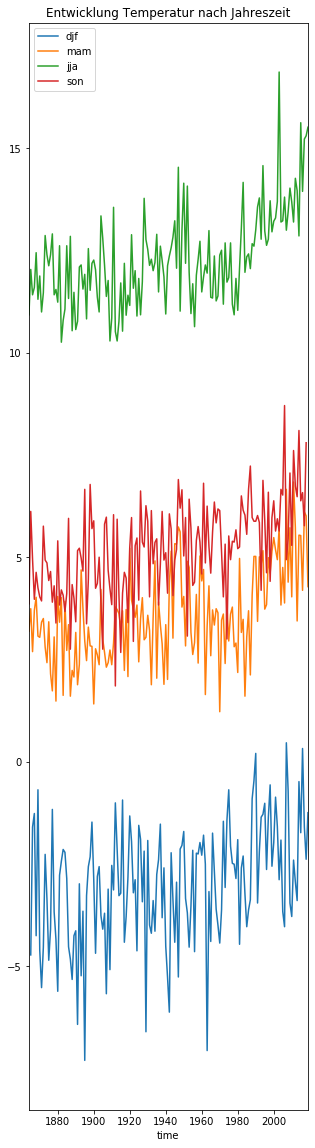

In [106]:
alle_jahreszeiten.plot(figsize=(5,20), x='time', title = 'Entwicklung Temperatur nach Jahreszeit')


### Story

Führen Sie zum Schluss hier Ihren "Pitch" and die Redaktion auf, mit Grafik und Kurzbeschrieb